- https://www.gymlibrary.dev/environments/classic_control/mountain_car/

In [1]:
import gym
import numpy as np

In [2]:
env = gym.make("MountainCar-v0")

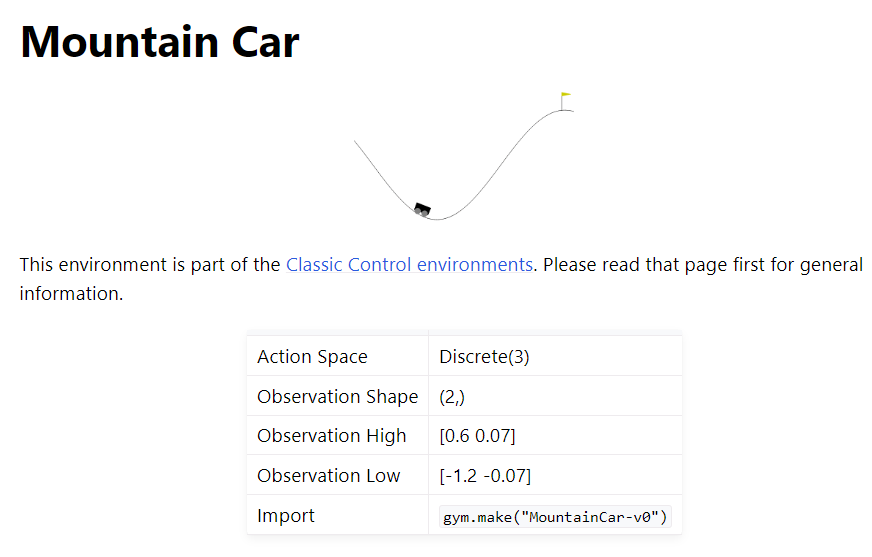

Common Function

In [3]:
def calculate_q_value(current_state_qvalue, reward, next_state_qvalue):
    """
    Calculate Q-value using Bellman equation
    """

    learning_rate = 0.1
    discount_factor = 0.9
    
    return (1 - learning_rate) * current_state_qvalue + learning_rate * (reward + discount_factor * next_state_qvalue)


def select_action(q_table, state, epsilon=0):
    """
    Selects the best action for a given state based on a Q-table with an option for random action choice.
    """
    # Discretize state
    d_state = discretize_state(state)

    # Take an action by random or using q_tables
    if np.random.random() >= epsilon:
        action = np.argmax(q_table[d_state])
    else:
        action = np.random.choice([0, 1, 2])

    return action


def update_q_table(q_table, state, action, next_state, reward):
    """
    Updates the Q-table based on the agent's action and the reward received.

    Parameters:
    q_table (array): The Q-table where rows represent states and columns represent actions.
    state (tuple): The current state of the agent.
    action (int): The action taken by the agent.
    next_ state (tuple): The state after taking the action.
    reward (float): The reward received after taking the action.

    Returns:
    array: The updated Q-table.
    """

    # Convert the current state to a discrete value.
    d_state = discretize_state(state)
    # Retrieve the current Q-value for the state-action pair.
    current_state_qvalue = q_table[d_state + (action,)]

    # Convert the next state to a discrete value.
    d_next_state = discretize_state(next_state)
    # Find the maximum Q-value for the next state.
    next_state_qvalue = np.max(q_table[d_next_state])

    # Calculate the new Q-value using the Bellman equation.
    q_value = calculate_q_value(current_state_qvalue, reward, next_state_qvalue)
    
    # Update the Q-table with the new Q-value.
    q_table[d_state + (action,)] = q_value
    
    return q_table

# 2. RF Mountain Car

**Step 1. Discretize State**

In [4]:
def discretize_state(state):
    num_bins = 20

    x_min, v_min = env.observation_space.low
    x_max, v_max = env.observation_space.high

    bins = [np.linspace(x_min, x_max, num_bins), np.linspace(v_min, v_max, num_bins)]
    discretized_state = tuple(np.digitize(s, b) for s, b in zip(state, bins))
    
    return discretized_state

**Step 2. Init Q-Table**

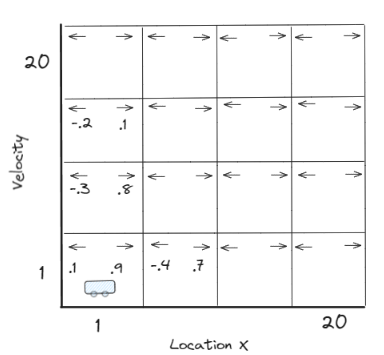

In [5]:
# Init Q-table as matrix with dimension are [20, 20, 3] and values is random from 0 to 2
q_table_size = [20, 20]
q_table = np.random.uniform(low=-1, high=1, size=(q_table_size + [env.action_space.n]))

**Step 3 : Learning**

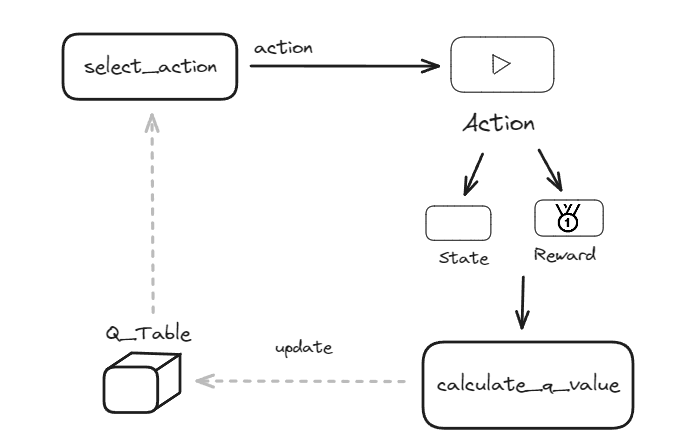

In [6]:
episo = 5000
epsilon = 1.0
epsilon_decay = 0.9995
min_epsilon = 0.01

for e in range(0, episo):
    # Init 
    current_state = env.reset()
    done = False
    
    while not done:

        # Step 1. Select an action by random or by q_table
        action = select_action(q_table, current_state, epsilon)
        
        # Step 2. Take an Action
        next_state, reward, done, _  = env.step(action=action)
    
        # Step 3. Update q_table
        q_table = update_q_table(q_table, current_state, action, next_state, reward)
        
        current_state = next_state

    # Recedure epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

**Step 4** Run mountain car using q_table

In [9]:
state = env.reset()

done = False

while not done:
    action = select_action(q_table, state, 0)
    
    state, reward, done, _ = env.step(action)
    
    env.render()